In [1]:
import numpy as np
import os
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

In [17]:
# Verifying Environment Variable is functioning
TKN = os.getenv('IEX_TOKEN')
type(TKN)

str

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [41]:
# Set the list of tickers
list_of_tickers = ["SPY", "AGG"]

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)
tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format='pandas', close_only=True, token=TKN)
tickers_df.head()

SPY               AGG         
             close    volume   close   volume
date                                         
2019-04-18  290.02  68708513  108.19  2217221
2019-04-22  290.27  40160140  108.06  5725612
2019-04-23  292.88  52246633  108.25  3422712
2019-04-24  292.23  50392914  108.50  3000163
2019-04-25  292.05  57770862  108.49  2648150

In [42]:
#Remove volume column
tickers_df.drop(columns=['volume'], level= 1, inplace=True)
tickers_df.head()

,SPY,AGG
,close,close
date,,
2019-04-18,290.02,108.19
2019-04-22,290.27,108.06
2019-04-23,292.88,108.25
2019-04-24,292.23,108.50
2019-04-25,292.05,108.49


In [44]:
tickers_df.rename(columns={"close":""}, inplace=True)
tickers_df

,SPY,AGG
,,
date,,
2019-04-18,290.02,108.19
2019-04-22,290.27,108.06
2019-04-23,292.88,108.25
2019-04-24,292.23,108.50
2019-04-25,292.05,108.49
...,...,...
2020-04-09,278.20,117.25
2020-04-13,275.66,116.70


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [48]:
# Calculate the daily roi for the stocks
daily_returns = tickers_df.pct_change()
daily_returns.dropna(inplace=True)
daily_returns

,SPY,AGG
,,
date,,
2019-04-22,0.000862,-0.001202
2019-04-23,0.008992,0.001758
2019-04-24,-0.002219,0.002309
2019-04-25,-0.000616,-0.000092
2019-04-26,0.004657,0.002028
...,...,...
2020-04-09,0.015217,0.012434
2020-04-13,-0.009130,-0.004691


In [65]:
# Use the `mean` function to calculate the mean of daily returns for SPY and AGG, respectively
avg_daily_return_spy = daily_returns.mean()['SPY']['']
avg_daily_return_agg = daily_returns.mean()['AGG']['']
print(f"SPY: {avg_daily_return_spy}\n"
     f"AGG: {avg_daily_return_agg}\n"
     )

SPY: 3.854053940775648e-05
AGG: 0.00034123414898388436



In [71]:
# Calculate volatility
std_dev_daily_return_spy = daily_returns.std()['SPY']['']
std_dev_daily_return_agg = daily_returns.std()['AGG']['']
print(f"SPY: {std_dev_daily_return_spy}\n"
     f"AGG: {std_dev_daily_return_agg}\n"
     )

SPY: 0.01954355876045549
AGG: 0.005411334419609489



In [72]:
# Save the last day's closing price
spy_last_price = daily_returns['SPY'][-1]
agg_last_price = daily_returns['AGG'][-1]
print(f"SPY: {spy_last_price}\n"
     f"AGG: {agg_last_price}\n"
     )

SPY: 0.004824308755760454
AGG: 0.0012794268167861667



In [73]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30

# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [84]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
# Initialize the simulated prices list with the last closing price of TSLA
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 * 3 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (75% TSLA; 25% SPHD)
    weights = [0.6, 0.4]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    monte_carlo[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
monte_carlo.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7556,1.988865,2.029269,3.762047,0.983538,1.723848,0.522891,4.635427,1.571244,8.140589,3.510622,...,0.645352,1.388814,2.711186,1.024305,3.527021,3.205870,2.724031,6.381312,2.079314,2.910029
7557,1.973872,2.027759,3.694893,0.977842,1.752007,0.521477,4.642338,1.575297,8.078751,3.548082,...,0.649660,1.348934,2.656528,1.039968,3.506516,3.174994,2.692794,6.410382,2.050716,2.853719
7558,1.981301,2.025696,3.674504,0.960252,1.756627,0.517728,4.704251,1.559173,8.087773,3.506654,...,0.650908,1.354853,2.601582,1.030711,3.569943,3.222921,2.687149,6.500961,2.105102,2.840758
7559,1.942390,2.011314,3.634439,0.946785,1.748967,0.516121,4.645140,1.569566,8.123534,3.549969,...,0.653633,1.361440,2.590243,1.033919,3.520328,3.302890,2.665551,6.388193,2.092667,2.833769
7560,1.939044,1.995766,3.637077,0.948622,1.763545,0.511417,4.737560,1.584617,8.181711,3.561290,...,0.648053,1.355800,2.577339,1.033010,3.533115,3.237724,2.665496,6.463539,2.076440,2.832967


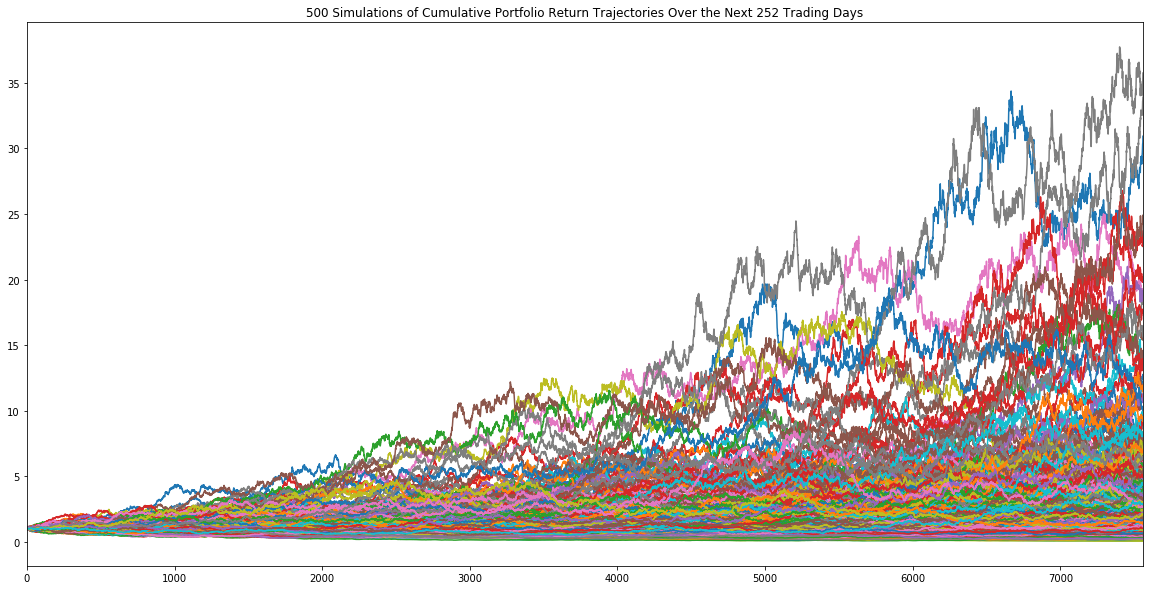

In [85]:
# Visualize the Simulation
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
monte_carlo.plot(legend=None, figsize=(20,10), title=plot_title)

In [88]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns_30 = monte_carlo.iloc[-1, :]
ending_cumulative_returns_30.head()

0    1.939044
1    1.995766
2    3.637077
3    0.948622
4    1.763545
Name: 7560, dtype: float64

In [89]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns_20 = monte_carlo.iloc[-10, :]
ending_cumulative_returns_20.head()

0    2.103232
1    2.188757
2    3.823872
3    0.956504
4    1.740496
Name: 7551, dtype: float64

In [96]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns_30.quantile(q=[0.10, 0.90])
confidence_interval

0.1    0.564048
0.9    6.815423
Name: 7560, dtype: float64

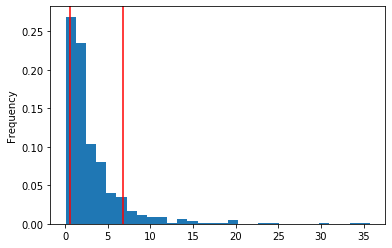

In [97]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=30)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [99]:
expected_cum_returns_30 = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.9])
expected_cum_returns_30

0.1    0.564048
0.5    1.981496
0.9    6.815423
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [103]:
# Set initial investment
initial_investment = 20000
# Calculate expected portfolio return at nth percentile times initial investment 
expected_portfolio_returns = round(initial_investment * expected_cum_returns_30, 2)
expected_portfolio_returns

0.1     11280.95
0.5     39629.93
0.9    136308.45
Name: 7560, dtype: float64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [112]:
#Projected Annual Income: $6085
value_at_4_pct = round(.4*(initial_investment*ending_cumulative_returns.quantile(0.1)),2)
value_at_4_pct

4512.38

In [123]:
print(f"A 4% withdraw rate from the retirement portfolio will not meet the value of the projected annual income  \n"
      f"from the plaid analysis. This is because a 4% withdraw from the retirement portfolio is equal\n"
      f"to ${value_at_4_pct}, and the projected annual income is equal to $6085.")

A 4% withdraw rate from the retirement portfolio will not meet the value of the projected annual income  
from the plaid analysis. This is because a 4% withdraw from the retirement portfolio is equal
to $4512.38, and the projected annual income is equal to $6085.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [121]:
invalue_50_pct_increase = round(.4*((1.5*initial_investment)*ending_cumulative_returns.quantile(.1)),2)
diff = round((invalue_50_pct_increase - 6085),2)
print(f"A 50% increase to the initial investment amount will surely cause the value of a 4% retirement withdrawal to exceed \n" 
      f"the the value of the projected annual income by ${diff}. The new value of the 4 percent retirement\n"
     f"withdrawal will be equal to ${invalue_50_pct_increase}.")

A 50% increase to the initial investment amount will surely cause the value of a 4% retirement withdrawal to exceed 
the the value of the projected annual income by $683.57. The new value of the 4 percent retirement
withdrawal will be equal to $6768.57.


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE